# Tensorflow


Try running the following code in your Python console to make sure you have TensorFlow properly installed. The console will print "Hello, world!" if TensorFlow is installed.

In [2]:
import tensorflow as tf

# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


# Hello, Tensor World!

## Tensor

In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of<br> hello_constant = tf.constant('Hello World!'), hello_constant is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:

#A is a 0-dimensional int32 tensor<br>
A = tf.constant(1234) 
#B is a 1-dimensional int32 tensor<br>
B = tf.constant([123,456,789]) 
#C is a 2-dimensional int32 tensor<br>
C = tf.constant([ [123,456,789], [222,333,444] ])

tf.constant() is one of many TensorFlow operations you will use in this lesson. The tensor returned by tf.constant() is called a constant tensor, because the value of the tensor never changes.

## Session

TensorFlow’s api is built around the idea of a computational graph, a way of visualizing a mathematical process which you learned about in the MiniFlow lesson. Let’s take the TensorFlow code you ran and turn that into a graph:

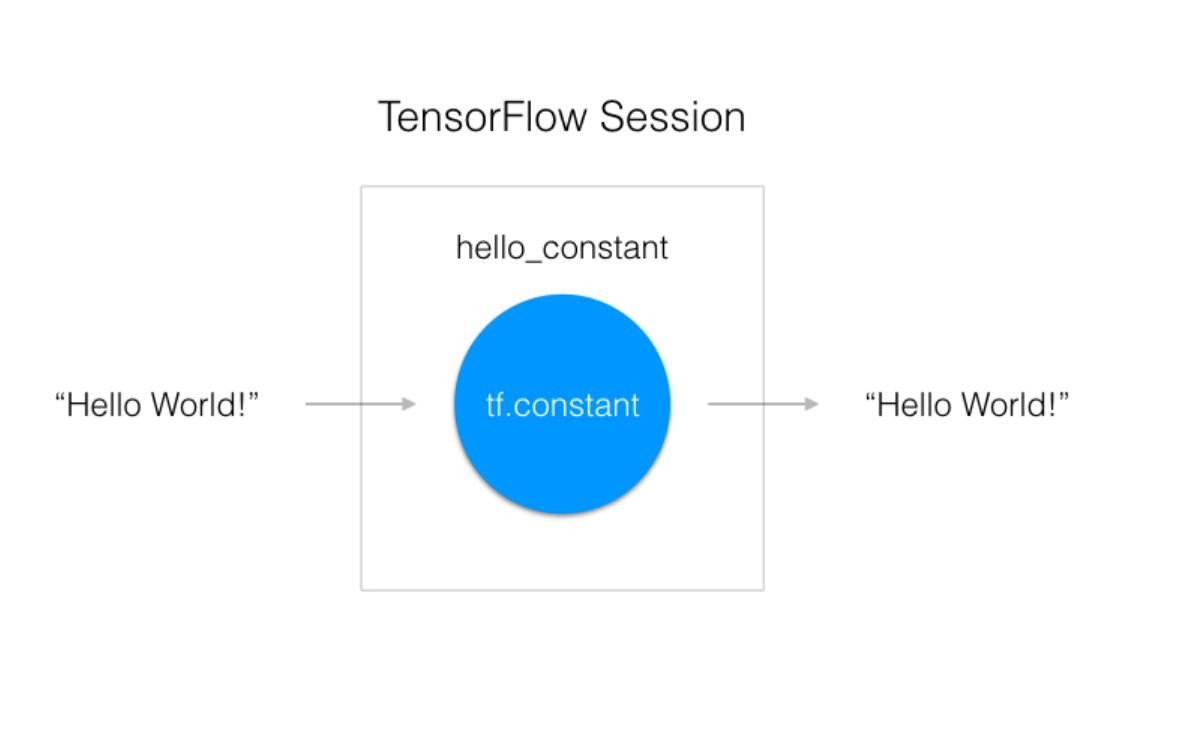

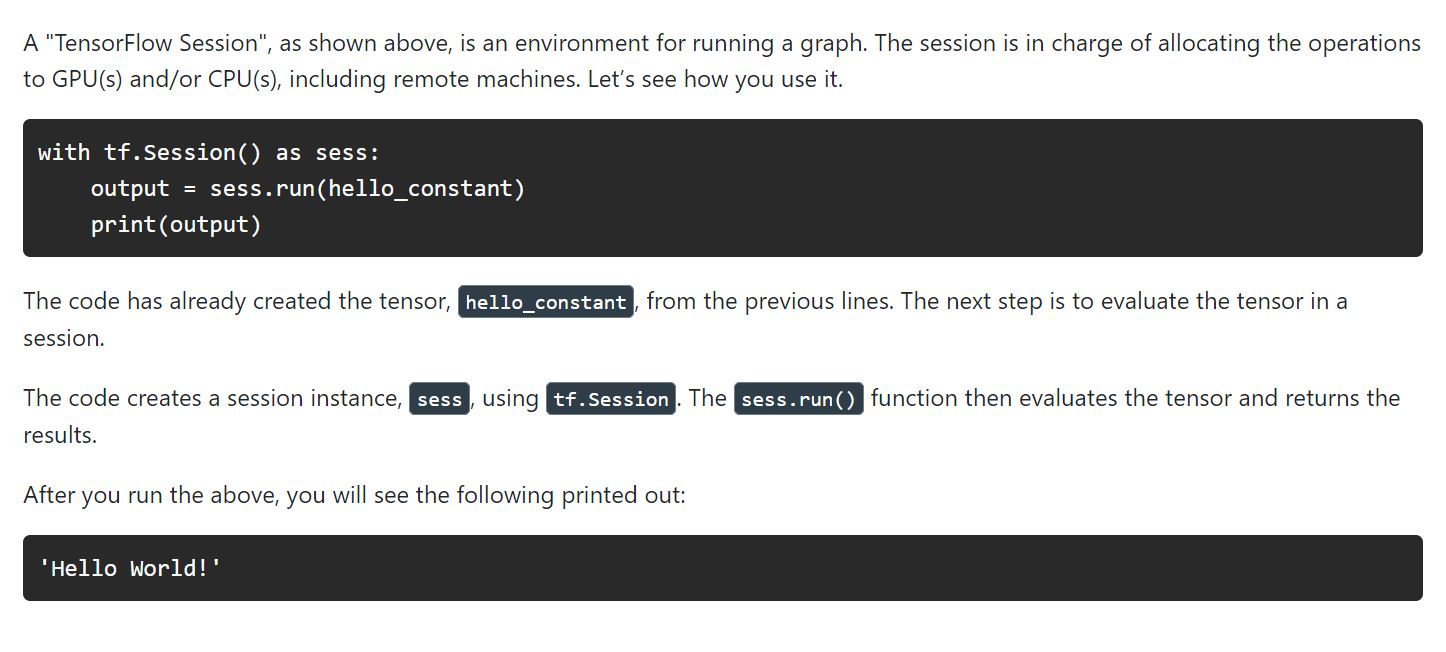

# TensorFlow Linear Function

The most common operation in neural networks is calculating the linear combination of inputs, weights, and biases. As a reminder, we can write the output of the linear operation as

y=Wx+b


Here, W is a matrix of the weights connecting two layers. The output y, the input x, and the biases b are all vectors.

## Weights and Bias in TensorFlow

The goal of training a neural network is to modify weights and biases to best predict the labels. In order to use weights and bias, you'll need a Tensor that can be modified. This leaves out tf.placeholder() and tf.constant(), since those Tensors can't be modified. This is where tf.Variable class comes in.

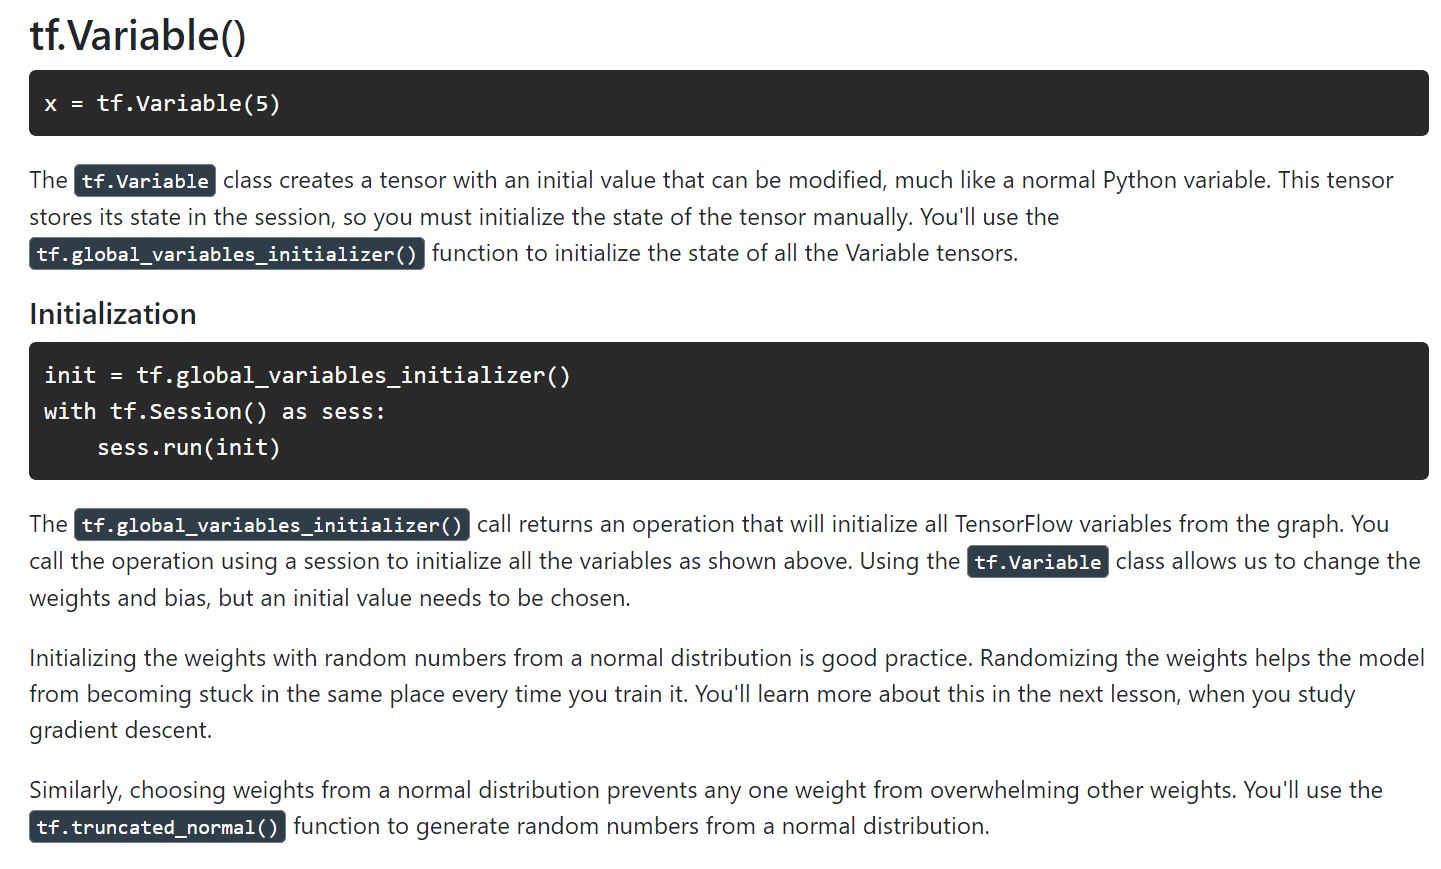

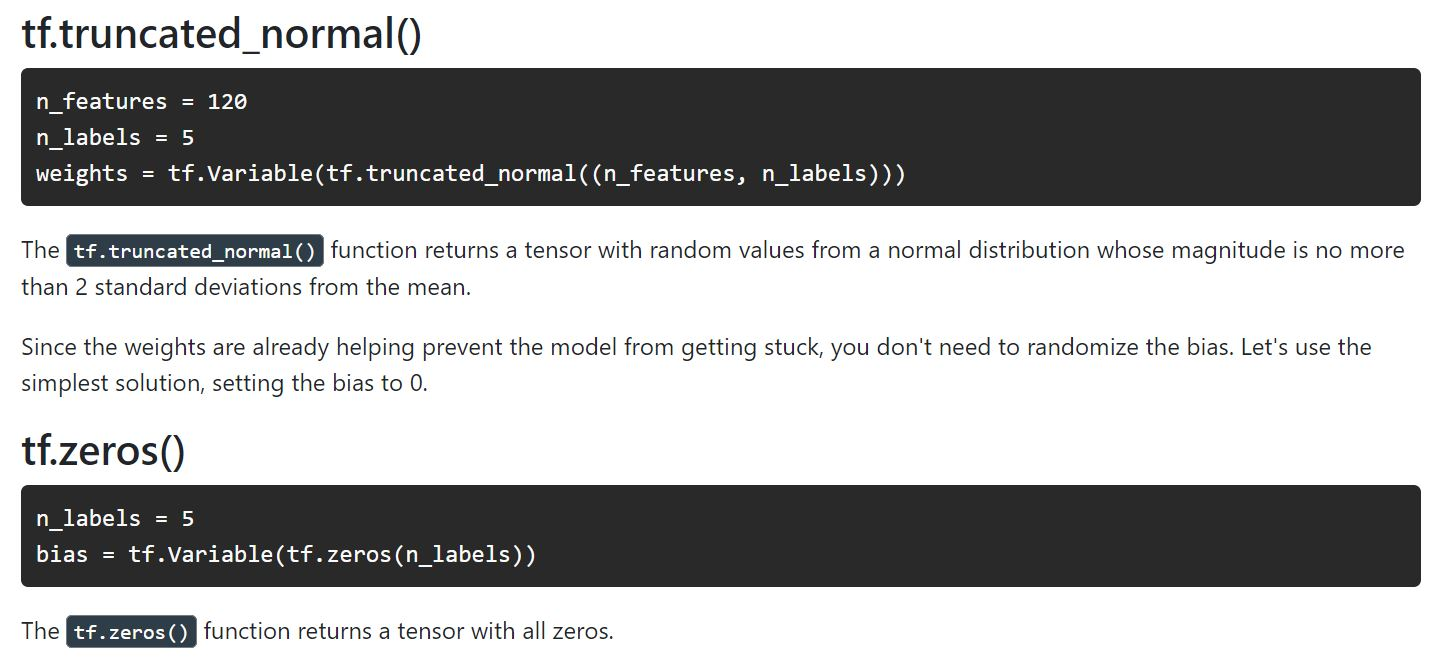

## EXAMPLE : Linear Classifier

You'll be classifying the handwritten numbers 0, 1, and 2 from the MNIST dataset using TensorFlow. The above is a small sample of the data you'll be training on. Notice how some of the 1s are written with a serif at the top and at different angles. The similarities and differences will play a part in shaping the weights of the model.



#QUESTION CODES - 1  (Quiz.py)
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    pass


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    pass


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    pass

#QUESTION CODES - 2  (Sandbox.py)
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from quiz import get_weights, get_biases, linear


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


#Number of features (28*28 image is 784 features)
n_features = 784
#Number of labels
n_labels = 3

#Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

#Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

#Linear Function xW + b
logits = linear(features, w, b)

#Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    # TODO: Initialize session variables
    
    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

#Print loss
print('Loss: {}'.format(l))

In [3]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    return tf.add(tf.matmul(input, w), b)

In [5]:
# Sandbox Solution
# Note: You can't run code in this tab
from tensorflow.examples.tutorials.mnist import input_data
from quiz import get_weights, get_biases, linear


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /datasets/ud730/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /datasets/ud730/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /datasets/ud730/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /datasets/ud730/mnist\t10k-labels-idx1-ubyte.gz
Loss: 5.3920392990112305


# TensorFlow Softmax

The softmax function squashes it's inputs, typically called logits or logit scores, to be between 0 and 1 and also normalizes the outputs such that they all sum to 1. This means the output of the softmax function is equivalent to a categorical probability distribution. It's the perfect function to use as the output activation for a network predicting multiple classes.



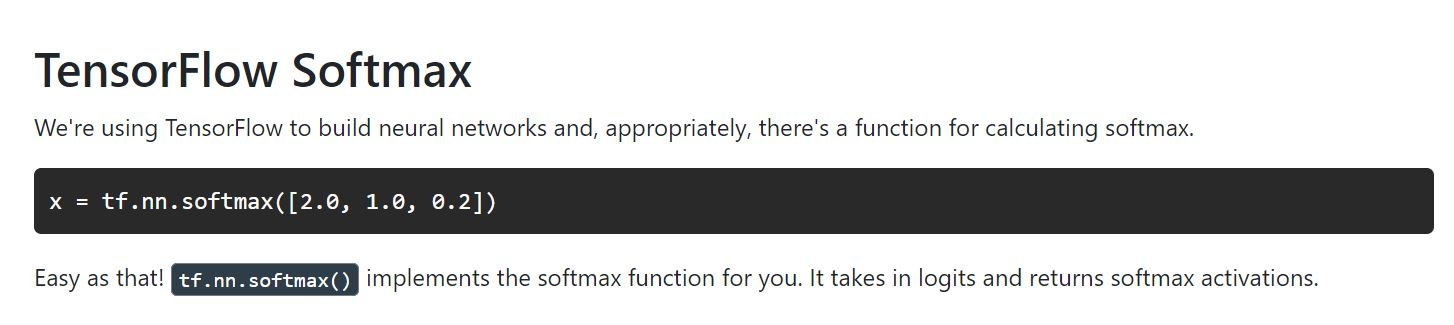

#Question 
import tensorflow as tf


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)
    
    # TODO: Calculate the softmax of the logits
    # softmax =     
    
    with tf.Session() as sess:
        # TODO: Feed in the logit data
        # output = sess.run(softmax,    )

    return output

In [6]:
# Note: You can't run code in this tab
import tensorflow as tf


def run():
    output = None
    logit_data = [2.0, 1.0, 0.1]
    logits = tf.placeholder(tf.float32)

    softmax = tf.nn.softmax(logits)

    with tf.Session() as sess:
        output = sess.run(softmax, feed_dict={logits: logit_data})

    return output

# Cross Entropy in TensorFlow

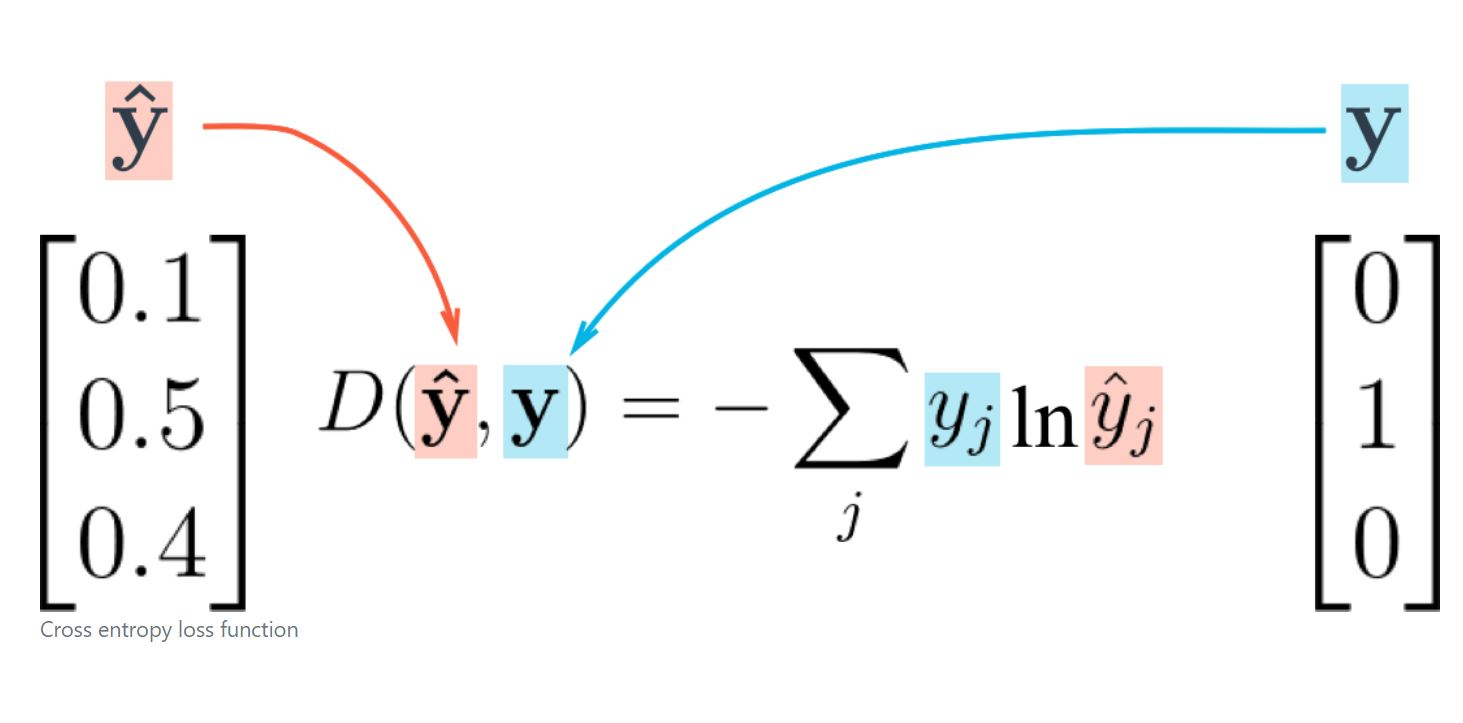

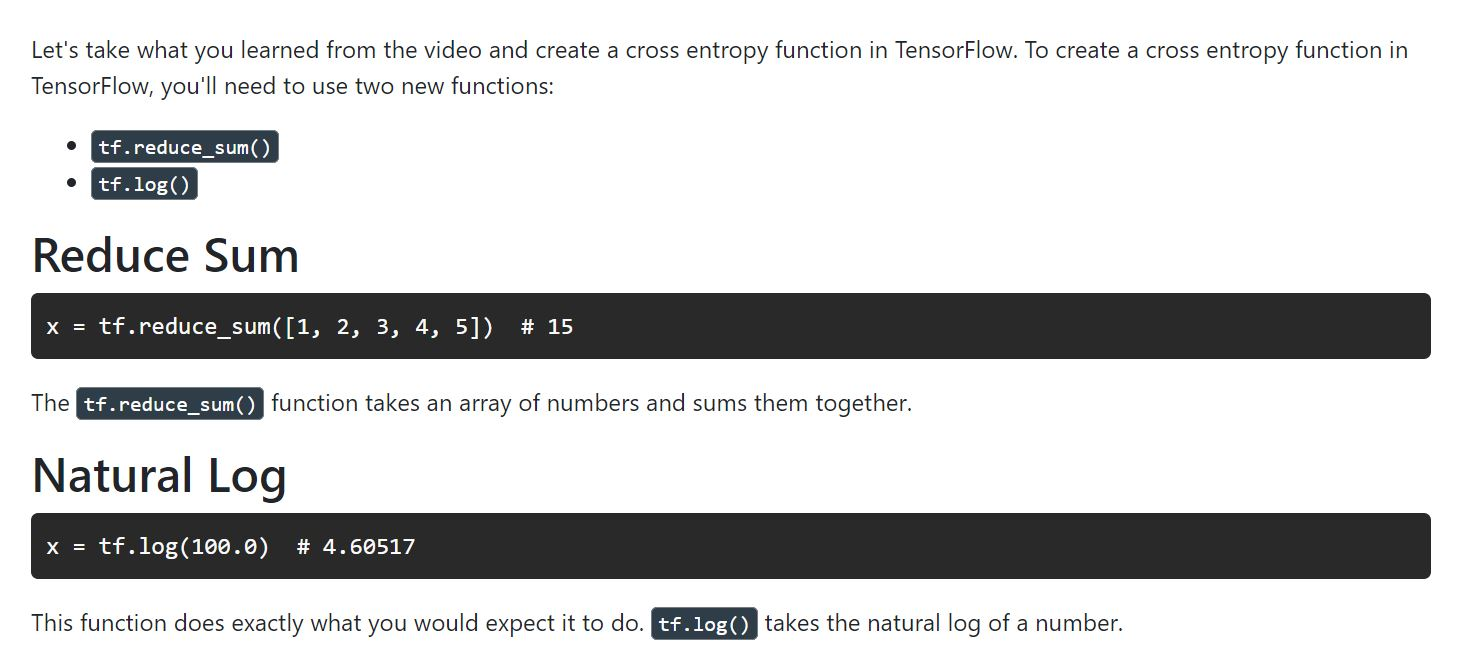

#QUESTION
#Solution is available in the other "solution.py" tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

#TODO: Print cross entropy from session

In [7]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

# ToDo: Print cross entropy from session
cross_entropy = -tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))

with tf.Session() as sess:
    print(sess.run(cross_entropy, feed_dict={softmax: softmax_data, one_hot: one_hot_data}))

0.35667497


# Mini-batch

In this section, you'll go over what mini-batching is and how to apply it in TensorFlow.

Mini-batching is a technique for training on subsets of the dataset instead of all the data at one time. This provides the ability to train a model, even if a computer lacks the memory to store the entire dataset.

Mini-batching is computationally inefficient, since you can't calculate the loss simultaneously across all samples. However, this is a small price to pay in order to be able to run the model at all.

It's also quite useful combined with SGD. The idea is to randomly shuffle the data at the start of each epoch, then create the mini-batches. For each mini-batch, you train the network weights with gradient descent. Since these batches are random, you're performing SGD with each batch.

Let's look at the MNIST dataset with weights and a bias to see if your machine can handle it.

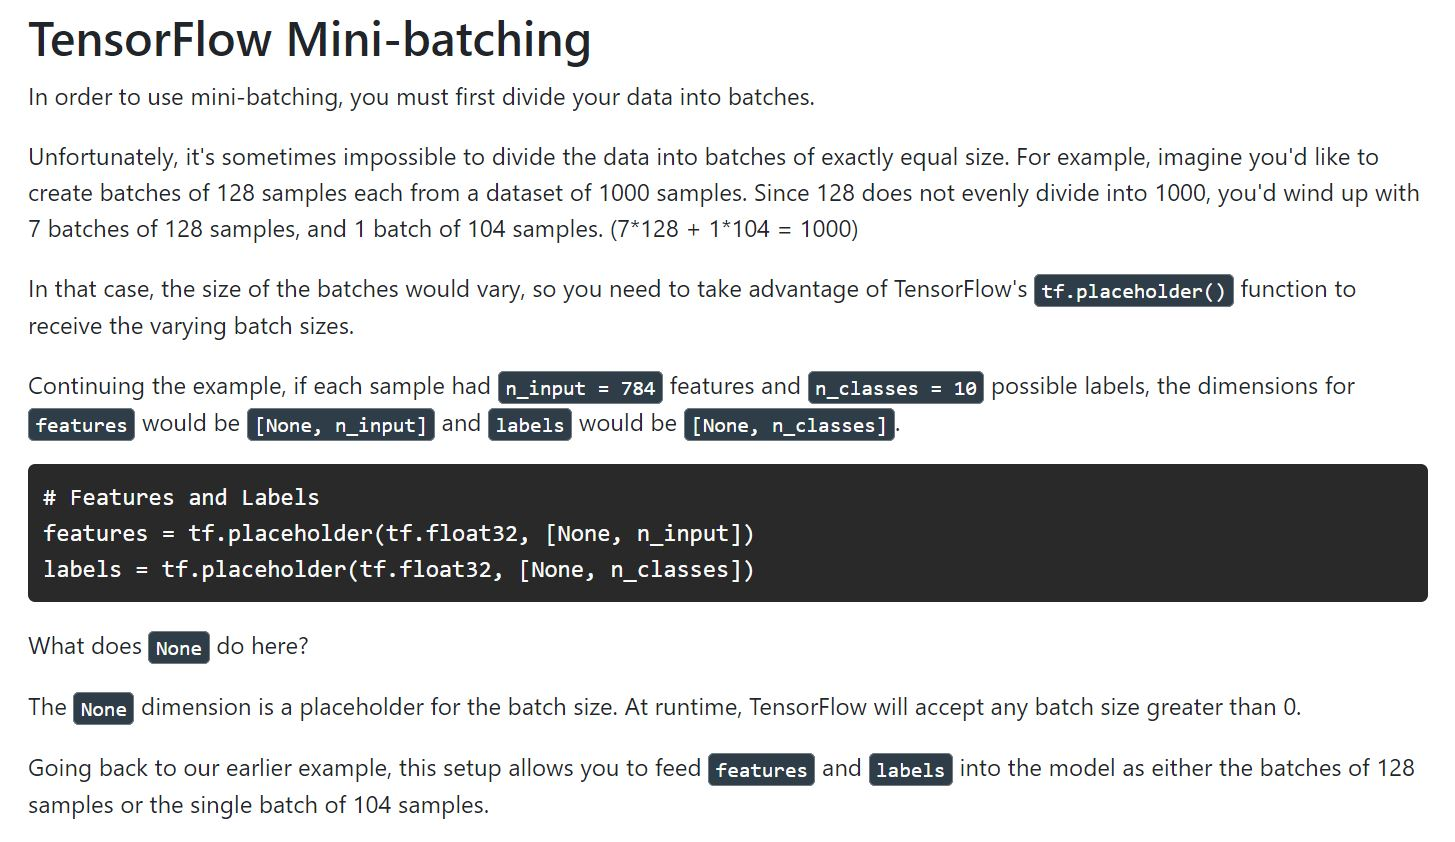

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# TODO: Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # TODO: Train optimizer on all batches
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

C:\Users\KIIT\anaconda3\envs\tensorflow-py-3'5\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KIIT\anaconda3\envs\tensorflow-py-3'5\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KIIT\anaconda3\envs\tensorflow-py-3'5\lib\site-packages\tensorflow\python\framework\dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KIIT\anaconda3\envs\tensorflow-

Extracting /datasets/ud730/mnist\train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-labels-idx1-ubyte.gz
Test Accuracy: 0.08640000224113464
